In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn import datasets, neighbors  
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import joblib

In [409]:
df = pd.read_csv("https://raw.githubusercontent.com/mohamadmoselhy/Data-Science-Projects/main/KNN/Diabetes%20Dataset/diabetes.csv")

In [410]:
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [411]:
print(df.isnull().sum()) 

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [412]:
print(df.duplicated().sum())

0


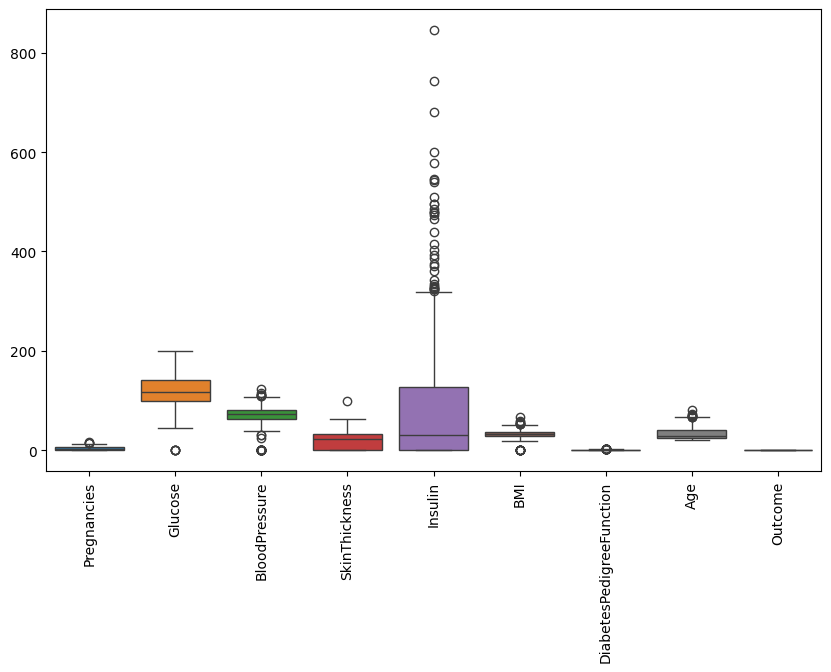

In [413]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

In [414]:
df_WithoutOutliers = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

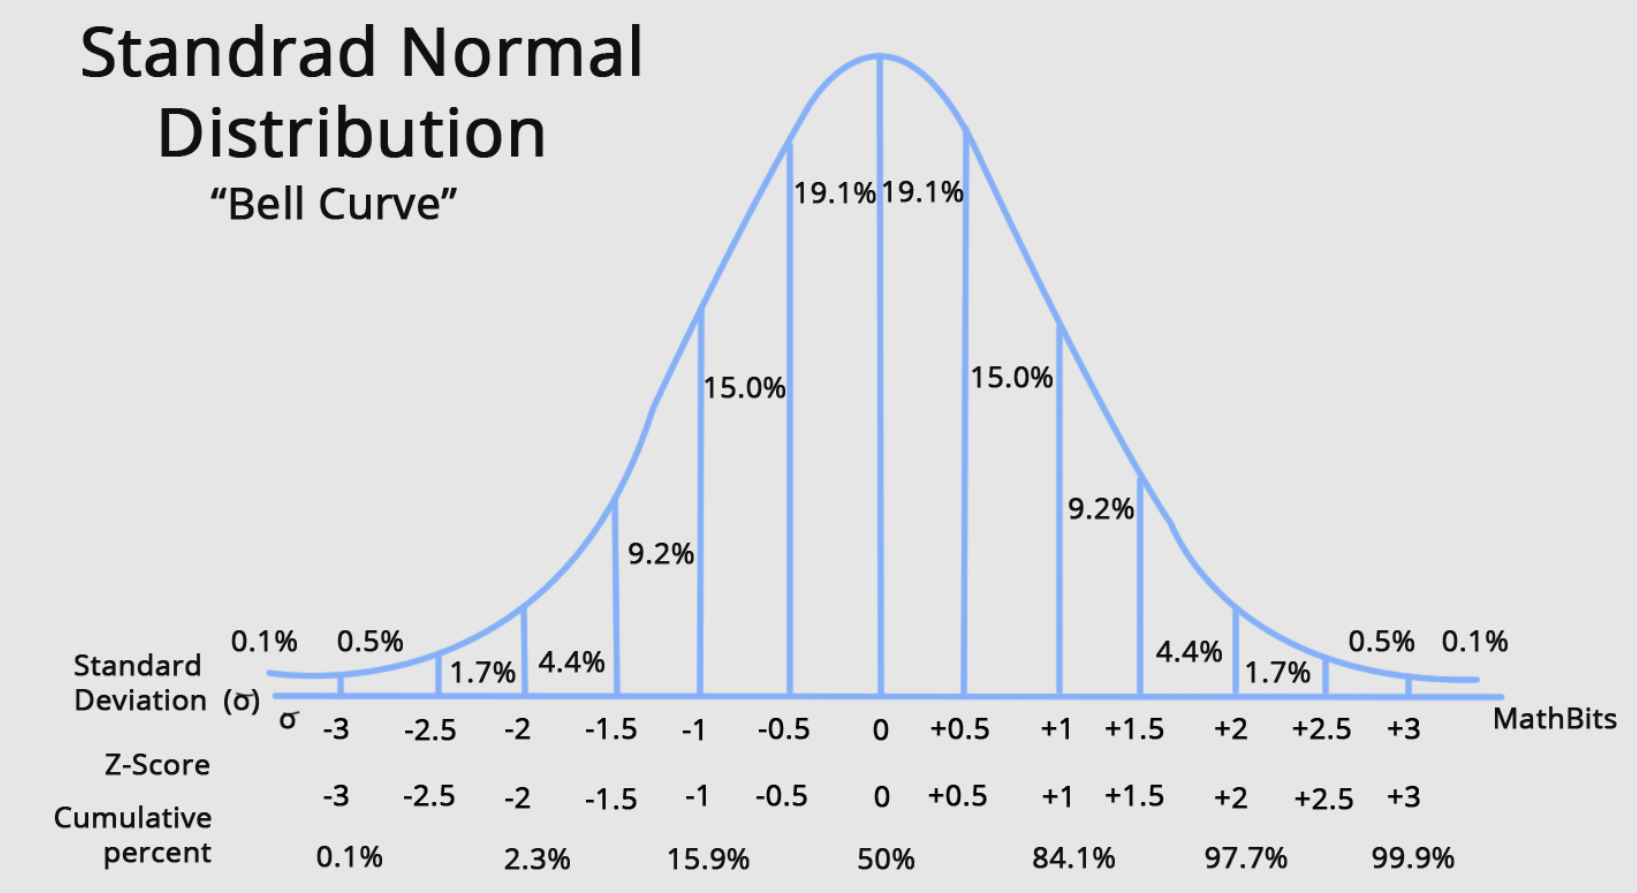
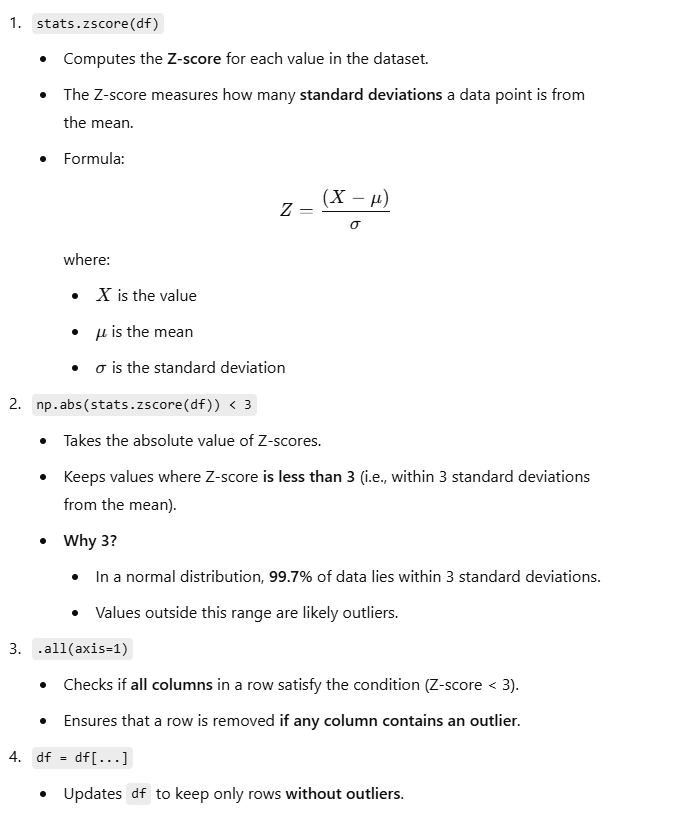


In [415]:
print(df.shape)
print(df_WithoutOutliers.shape)

(768, 9)
(688, 9)


In [416]:
X = df_WithoutOutliers.iloc[:,:-1]  # Features
y = df_WithoutOutliers.iloc[:,-1]  # Target variable
print(f"All data without Target column: {X.shape}")
print(f"Target Column: {y.shape}")

All data without Target column: (688, 8)
Target Column: (688,)


In [417]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=0)
print(f"Training data: {X_train.shape}, Testing data: {X_test.shape}")

Training data: (550, 8), Testing data: (138, 8)


## Apply KNN Model

In [418]:
knn=neighbors.KNeighborsClassifier(14)

In [419]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=14)

In [420]:
y_Pred=knn.predict(X_test)
y_Pred

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1])

In [421]:
print(accuracy_score(y_test, y_Pred)*100)

76.81159420289855


In [422]:
print(knn.score(X_train, y_train))

print(knn.score(X_test, y_test))

0.7909090909090909
0.7681159420289855


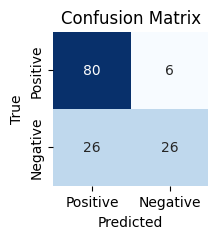

In [423]:
cm = confusion_matrix(y_test, y_Pred)

plt.figure(figsize=(2, 2))  
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'], cbar=False)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [424]:
TP, FN, FP, TN = cm[0, 0], cm[0, 1], cm[1, 0], cm[1, 1]

print(f"True Positive (TP): {TP}")
print(f"False Negative (FN): {FN}")
print(f"False Positive (FP): {FP}")
print(f"True Negative (TN): {TN}")


True Positive (TP): 80
False Negative (FN): 6
False Positive (FP): 26
True Negative (TN): 26


In [425]:
Accuracy=(TP+FP)/(TP+FP+TN+FN)
Precision=TP/(TP+FP)
Recall= TP/(TP+FN)
F1Score=2*(Precision*Recall)/(Precision+Recall)

In [426]:
print(f"Accuracy: {Accuracy :.2f}%")
print(f"Precision: {Precision * 100:.2f}%")
print(f"Recall: {Recall * 100:.2f}%")
print(f"F1 Score: {F1Score * 100:.2f}%")


Accuracy: 0.77%
Precision: 75.47%
Recall: 93.02%
F1 Score: 83.33%


# GridSearchCV

In [427]:
# Define the parameter grid for K
param_grid = {'n_neighbors': range(1, 25)}

knn = KNeighborsClassifier()

#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}

#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn, param_grid, cv=5)

#fit model to data
knn_gscv.fit(X, y)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [428]:
knn_gscv.best_params_

{'n_neighbors': np.int64(14)}

In [429]:
knn_gscv.best_score_

np.float64(0.7602031101237703)

In [ ]:
joblib.dump(knn, 'model.pkl')